# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [2]:
# !pip install tensorflow


Empezamos importando librerías

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [9]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

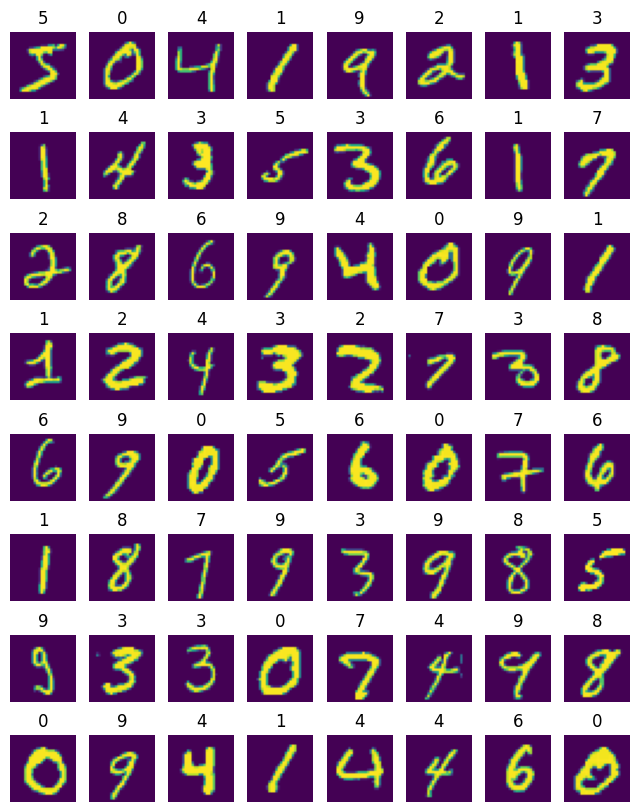

In [5]:
fig, axes = plt.subplots(8,8, figsize=(8,10))
for idx, ax in enumerate(axes.flat):
    ax.imshow(X_train[idx], aspect='auto')
    ax.axis('off')
    ax.set_title(f"{y_train[idx]}")

plt.subplots_adjust(hspace=0.5)
plt.show()

Vemos dimensiones del dataset

In [6]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

In [10]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [5]:
# X_train = X_train.reshape(-1, 28, 28, 1)
# X_test = X_test.reshape(-1, 28, 28, 1)

In [11]:
np.mean(X_train)

np.float32(0.13066062)

In [14]:
y_train[0]

np.uint8(5)

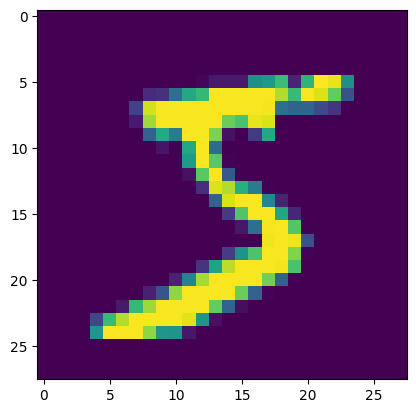

In [13]:
'''
Comprobamos la normalización
'''
plt.imshow(X_train[0])

In [8]:
# y_train = y_train.astype("float32")
# y_test = y_test.astype("float32")

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [17]:
X_train.reshape(60000, 28*28)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
print(X_train.shape)

print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [42]:
model = keras.models.Sequential() # Instanciamos el modelo

In [43]:
model.add(keras.layers.Flatten(input_shape=(28,28))) # Primera Pseudo-capa -> de matriz a array

c:\Users\Ort\miniconda3\envs\data_env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
model.add(keras.layers.Dense(200, activation="relu")) # primera capa (hidden)

In [45]:
model.add(keras.layers.Dense(100, activation="relu")) # segunda capa (hidden)

In [46]:
# model.add(keras.layers.Dense(300))
# model.add(keras.layers.Activation("relu"))

In [47]:
# from tensorflow.keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Flatten

In [ ]:
# model = keras.models.Sequential()


In [49]:
# model.add(Conv2D(64, activation='relu', kernel_size=3, input_shape=(28,28,1)))

In [50]:
# model.add(Conv2D(32,activation='relu',  kernel_size=3))

In [51]:
# model.add(Flatten())

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28))) # Primera Pseudo-capa -> de matriz a array
model.add(keras.layers.Dense(200, activation="relu")) # primera capa (hidden)
model.add(keras.layers.Dropout(0.4)) 
model.add(keras.layers.Dense(100, activation="relu")) # segunda capa (hidden)
model.add(keras.layers.Dropout(0.4)) 

model.add(keras.layers.Dense(units = 10,
                            activation='softmax')) # Capa de salida (classification, 10 class)

c:\Users\Ort\miniconda3\envs\data_env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

# Definimos el modelo secuencial
modelo_denso_pro = Sequential([
    
    # 1. Capa de Entrada: "Aplanamos" la imagen de 28x28 a un vector de 784 píxeles
    Flatten(input_shape=(28, 28)),
    
    # --- PRIMERA CAPA OCULTA (GRANDE Y REGULARIZADA) ---
    Dense(512, activation='relu'),
    # Una capa densa ancha con 512 neuronas para que tenga mucha capacidad de aprender.
    
    BatchNormalization(),
    # EL TRUCO ESTRELLA: Normaliza las salidas de la capa anterior. Esto estabiliza 
    # y acelera el entrenamiento una barbaridad, y además ayuda a regularizar.
    
    Dropout(0.4),
    # Un Dropout fuertecito para evitar que esta capa tan grande se vicie y memorice.
    
    # --- SEGUNDA CAPA OCULTA ---
    Dense(256, activation='relu'),
    # Una segunda capa para refinar lo que ha aprendido la primera.
    
    BatchNormalization(),
    # Otra vez, para mantener todo estable.
    
    Dropout(0.3),
    # Un poco menos de Dropout aquí, pero todavía necesario.
    
    # --- CAPA DE SALIDA ---
    Dense(10, activation='softmax')
    # La capa final con 10 neuronas para la clasificación de los 10 dígitos.
])

c:\Users\Ort\miniconda3\envs\data_env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [126]:

# model.add(keras.layers.Dense(units = 10,
#                             activation='softmax')) # Capa de salida (classification, 10 class)

In [113]:
784*200 + 200

157000

In [114]:
200*100 + 100

20100

In [115]:
100 * 10 + 10

1010

In [127]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 188,210 (735.20 KB)

 Trainable params: 188,210 (735.20 KB)

 Non-trainable params: 0 (0.00 B)

In [117]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [134]:
# Equivalente
model.compile(
    optimizer = "adamw", # Adam
    loss = "sparse_categorical_crossentropy", # sparse_cat vs cat
    metrics = ["accuracy"] # la que mejor nos venga
)

In [135]:
# Summary
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 188,210 (735.20 KB)

 Trainable params: 188,210 (735.20 KB)

 Non-trainable params: 0 (0.00 B)

Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [120]:
54000/128

421.875

In [136]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 20,
    validation_split = 0.1
)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9870 - loss: 0.0452 - val_accuracy: 0.9832 - val_loss: 0.0754
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9873 - loss: 0.0452 - val_accuracy: 0.9807 - val_loss: 0.0784
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9861 - loss: 0.0445 - val_accuracy: 0.9817 - val_loss: 0.0772
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9864 - loss: 0.0470 - val_accuracy: 0.9815 - val_loss: 0.0785
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9877 - loss: 0.0401 - val_accuracy: 0.9838 - val_loss: 0.0789
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9874 - loss: 0.0445 - val_accuracy: 0.9820 - val_loss: 0.0852
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9858 - loss: 0.0469 - val_accuracy: 0.9817 - val_loss: 0.0840
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9878 - loss: 0.0407 - val_accuracy: 0.

In [130]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9760 - loss: 0.1031


[0.09011698514223099, 0.9799000024795532]

In [34]:
print(history.params)
print(history.epoch)
history.history

{'verbose': 'auto', 'epochs': 10, 'steps': 422}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


{'accuracy': [0.9127222299575806,
  0.9636296033859253,
  0.97431480884552,
  0.9815370440483093,
  0.9857407212257385,
  0.9888148307800293,
  0.9920740723609924,
  0.9925370216369629,
  0.9940370321273804,
  0.9952037334442139],
 'loss': [0.30535948276519775,
  0.12199995666742325,
  0.08447824418544769,
  0.060145292431116104,
  0.04562140256166458,
  0.03555985912680626,
  0.027636496350169182,
  0.023794688284397125,
  0.018674062564969063,
  0.015468413010239601],
 'val_accuracy': [0.9631666541099548,
  0.968500018119812,
  0.9754999876022339,
  0.9754999876022339,
  0.9763333201408386,
  0.9781666398048401,
  0.9789999723434448,
  0.9796666502952576,
  0.9789999723434448,
  0.9801666736602783],
 'val_loss': [0.12352114915847778,
  0.1089983731508255,
  0.07890480756759644,
  0.08596068620681763,
  0.08382438868284225,
  0.07899315655231476,
  0.07808112353086472,
  0.07468433678150177,
  0.08082265406847,
  0.08676860481500626]}

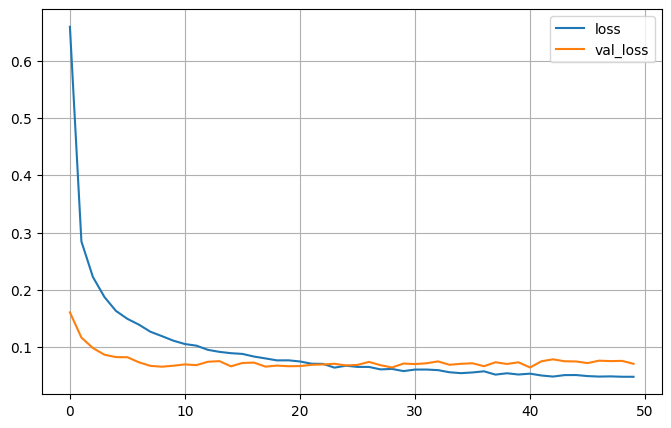

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[["loss", "val_loss"]].plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

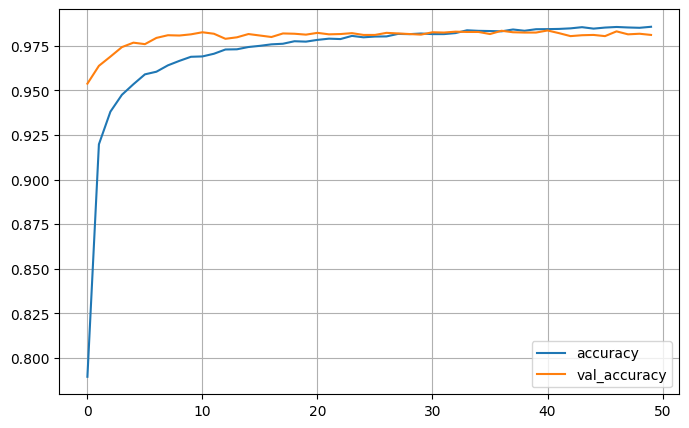

In [132]:
pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [69]:
y_test[0]

np.uint8(7)

In [80]:
X_test[80]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

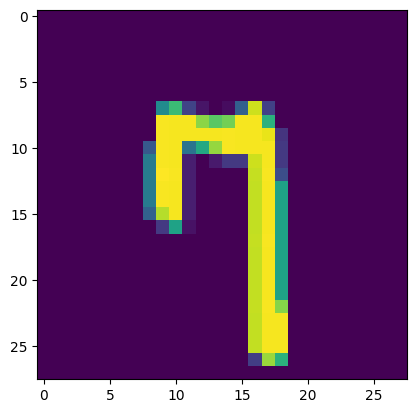

In [79]:
plt.imshow(X_test[80])

Mostrando 9 sietes sintéticos generados a partir de tu imagen:


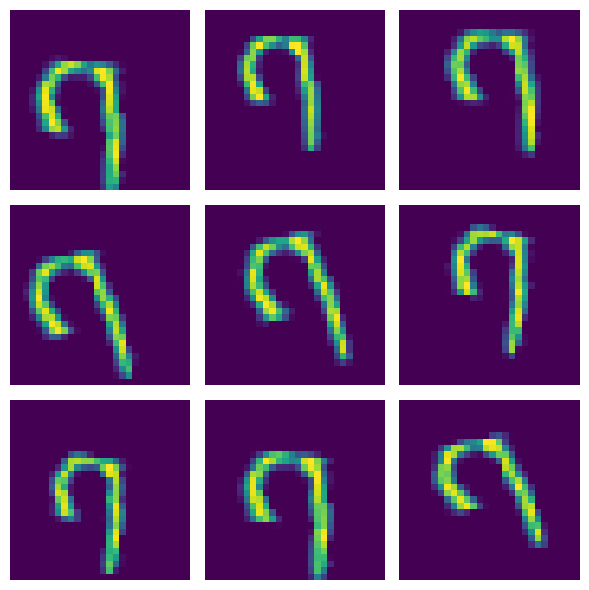

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --------------------------------------------------------------------------
# 1. CARGA TU IMAGEN ORIGINAL
# Asumo que tienes tu imagen del '7' en una variable numpy llamada 'imagen_siete'
# Si no la tienes, descomenta la siguiente línea y pon tu array de 28x28 aquí.
# imagen_siete = np.array([...]) 

# Para demostración, crearé una imagen de ejemplo. Reemplaza esto con tu imagen.
# (He intentado replicar la tuya a partir de la imagen que subiste)
imagen_siete = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 100, 200, 255, 255, 200, 150, 255, 255, 180, 50, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 80, 255, 255, 150, 100, 50, 100, 255, 255, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 100, 255, 100, 0, 0, 0, 0, 100, 255, 255, 50, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 60, 255, 200, 0, 0, 0, 0, 0, 0, 50, 255, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 120, 255, 150, 0, 0, 0, 0, 0, 0, 0, 255, 150, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 150, 255, 100, 0, 0, 0, 0, 0, 0, 0, 255, 180, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 100, 255, 200, 0, 0, 0, 0, 0, 0, 0, 255, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 50, 255, 255, 100, 0, 0, 0, 0, 0, 0, 150, 255, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 150, 255, 200, 0, 0, 0, 0, 0, 0, 100, 255, 150, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 80, 255, 255, 100, 0, 0, 0, 0, 0, 50, 255, 180, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 50, 180, 255, 200, 50, 0, 0, 0, 0, 0, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 220, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 180, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 150, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 120, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 255, 50, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
], dtype=np.float32)
# --------------------------------------------------------------------------


# 2. PREPARAR LA IMAGEN PARA EL GENERADOR
# El generador espera un array de 4D: (n_imagenes, alto, ancho, canales)
# Como solo tenemos una imagen, el shape será (1, 28, 28, 1)
imagen_siete_reshaped = imagen_siete.reshape((1, 28, 28, 1))

# 3. CONFIGURAR EL GENERADOR DE AUMENTACIÓN DE DATOS
datagen = ImageDataGenerator(
    rotation_range=15,      # Rota la imagen aleatoriamente hasta 15 grados
    width_shift_range=0.1,  # Desplaza la imagen horizontalmente (10% del ancho)
    height_shift_range=0.1, # Desplaza la imagen verticalmente (10% del alto)
    shear_range=0.15,       # Inclina la imagen
    zoom_range=0.1          # Hace zoom aleatorio a la imagen
)

# 4. GENERAR Y VISUALIZAR LAS IMÁGENES
# Generaremos 9 imágenes sintéticas para visualizarlas en una cuadrícula de 3x3
num_imagenes_a_generar = 9
imagenes_generadas = []

# Creamos un "flujo" de datos desde nuestra imagen
# Cada vez que pedimos un dato al 'flow', nos da una versión transformada
image_iterator = datagen.flow(imagen_siete_reshaped, batch_size=1)

# Generamos las imágenes
for i in range(num_imagenes_a_generar):
    # Obtenemos la siguiente imagen generada
    imagen_transformada = next(image_iterator)[0].reshape(28, 28)
    imagenes_generadas.append(imagen_transformada)

# Visualizamos las imágenes en una cuadrícula
print("Mostrando 9 sietes sintéticos generados a partir de tu imagen:")
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(imagenes_generadas[i], cmap='viridis')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [78]:
for i in range(10000):
    if predictions[i] != y_test[i]:
        print(i)
        print(predictions[i])
        print(y_test[i])
        break

80
9
7


In [74]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [73]:
np.argmax(model.predict(X_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([7, 2, 1, ..., 4, 5, 6])

In [71]:
np.argmax(model.predict(X_test)[0].round(3))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step


np.int64(7)

In [83]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = np.argmax(model.predict(X_test), axis=1)
confusion_matrix(y_test, predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ 970,    0,    0,    1,    1,    0,    1,    1,    2,    4],
       [   0, 1120,    5,    2,    0,    1,    1,    2,    2,    2],
       [   4,    0, 1009,    4,    4,    0,    0,    6,    4,    1],
       [   0,    0,    3,  992,    0,    3,    0,    2,    1,    9],
       [   1,    0,    2,    0,  943,    1,    6,    1,    0,   28],
       [   1,    0,    0,   12,    0,  869,    3,    0,    2,    5],
       [   5,    2,    2,    2,    5,   10,  928,    0,    1,    3],
       [   2,    2,    4,    6,    0,    0,    0,  993,    2,   19],
       [   1,    1,    3,   12,    0,    6,    0,    2,  936,   13],
       [   1,    0,    0,    8,    2,    6,    0,    0,    0,  992]])

In [27]:
print(classification_report(y_true=y_test, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# CONVOLUTIONS

Las imagenes en Keras (Tensorflow) tienen una tercera dimension con el numero de canales:
- 3 para imagenes color
- 1 escala de grises (0-1 para blanco y negro)

In [28]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [23]:
# X_train.shape, X_val.shape, X_test.shape

In [97]:
# from tensorflow.keras.utils import to_categorical
# #one-hot encode target column
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)
# y_val = to_categorical(y_val)

Bloque convolucional:

1. Convolucion (stride 1 y padding "same") con su activacion
2. Maxpooling
3. DropOut

>Tras el Bloque convolucional -> Flatten + Dense(s) + Output 

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
# Siempre al ppio ponemos el input shape que recordemos lleva la dimension de los canales
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))) 
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [30]:
model.compile(optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

In [31]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_3 (Dense)             (None, 10)                184330    
                                                                 
Total params: 203434 (794.66 KB)
Trainable params: 203434 (794.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
history_cnn = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 10,
    validation_split = 0.1 # validation_split = 0.1
)

Epoch 1/10
422/422 [==============================] - 85s 200ms/step - loss: 0.1997 - accuracy: 0.9398 - val_loss: 0.0678 - val_accuracy: 0.9828
Epoch 2/10
422/422 [==============================] - 84s 200ms/step - loss: 0.0576 - accuracy: 0.9831 - val_loss: 0.0572 - val_accuracy: 0.9847
Epoch 3/10
422/422 [==============================] - 86s 204ms/step - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.0513 - val_accuracy: 0.9873
Epoch 4/10
422/422 [==============================] - 85s 200ms/step - loss: 0.0285 - accuracy: 0.9912 - val_loss: 0.0498 - val_accuracy: 0.9880
Epoch 5/10
422/422 [==============================] - 83s 197ms/step - loss: 0.0209 - accuracy: 0.9933 - val_loss: 0.0494 - val_accuracy: 0.9877
Epoch 6/10
422/422 [==============================] - 79s 187ms/step - loss: 0.0169 - accuracy: 0.9945 - val_loss: 0.0588 - val_accuracy: 0.9867
Epoch 7/10
422/422 [==============================] - 78s 186ms/step - loss: 0.0120 - accuracy: 0.9961 - val_loss: 0.0574 - val_ac

In [33]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0576 - accuracy: 0.9859


[0.05755884572863579, 0.9858999848365784]

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [29]:
# history = model.fit(
#     X_train,
#     y_train,
#     batch_size = 64,
#     epochs = 10,
#     validation_split = 0.1
# )

Epoch 1/10
844/844 [==============================] - 12s 14ms/step - loss: 0.1795 - accuracy: 0.9492 - val_loss: 0.1460 - val_accuracy: 0.9603
Epoch 2/10
844/844 [==============================] - 13s 15ms/step - loss: 0.1683 - accuracy: 0.9521 - val_loss: 0.1371 - val_accuracy: 0.9640
Epoch 3/10
844/844 [==============================] - 15s 18ms/step - loss: 0.1586 - accuracy: 0.9555 - val_loss: 0.1302 - val_accuracy: 0.9658
Epoch 4/10
844/844 [==============================] - 10s 11ms/step - loss: 0.1491 - accuracy: 0.9585 - val_loss: 0.1247 - val_accuracy: 0.9660
Epoch 5/10
844/844 [==============================] - 8s 10ms/step - loss: 0.1413 - accuracy: 0.9603 - val_loss: 0.1219 - val_accuracy: 0.9672
Epoch 6/10
844/844 [==============================] - 11s 13ms/step - loss: 0.1336 - accuracy: 0.9630 - val_loss: 0.1170 - val_accuracy: 0.9678
Epoch 7/10
844/844 [==============================] - 13s 16ms/step - loss: 0.1271 - accuracy: 0.9638 - val_loss: 0.1109 - val_accuracy: 

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

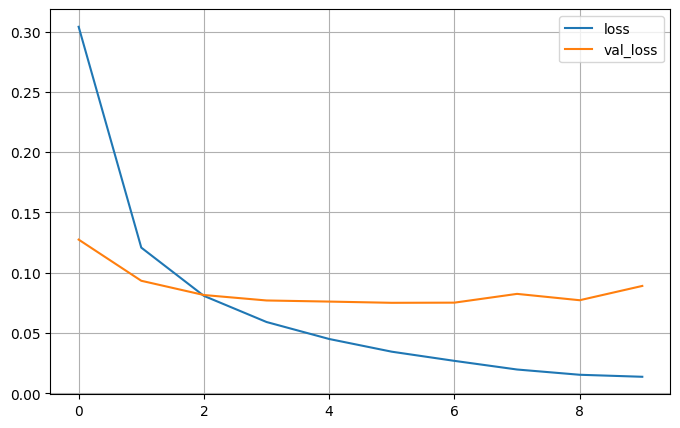

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[["loss", "val_loss"]].plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [35]:
results = model.evaluate(X_test, y_test)
results

313/313 [==============================] - 4s 13ms/step - loss: 0.0576 - accuracy: 0.9859


[0.05755884572863579, 0.9858999848365784]

In [36]:
predictions = [x.argmax() for x in predictions]

In [58]:
predictions

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 4,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [37]:
predictions = model.predict(X_test)
predictions = [x.argmax() for x in predictions]
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, predictions))

313/313 [==============================] - 4s 11ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       980
         1.0       0.98      0.99      0.99      1135
         2.0       0.97      0.97      0.97      1032
         3.0       0.97      0.98      0.97      1010
         4.0       0.97      0.98      0.97       982
         5.0       0.97      0.97      0.97       892
         6.0       0.97      0.97      0.97       958
         7.0       0.97      0.97      0.97      1028
         8.0       0.97      0.97      0.97       974
         9.0       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [38]:
confusion_matrix(y_test, predictions)

array([[ 972,    1,    2,    1,    0,    0,    2,    0,    2,    0],
       [   0, 1128,    1,    0,    1,    0,    2,    1,    2,    0],
       [   2,    4, 1010,    0,    2,    0,    2,    7,    5,    0],
       [   0,    0,    1, 1003,    0,    2,    0,    1,    3,    0],
       [   0,    2,    1,    0,  969,    0,    5,    0,    0,    5],
       [   1,    0,    2,    7,    0,  874,    6,    0,    1,    1],
       [   8,    2,    0,    0,    1,    2,  942,    0,    3,    0],
       [   0,    2,    6,    1,    0,    0,    0, 1013,    2,    4],
       [   1,    0,    1,    0,    0,    0,    1,    2,  968,    1],
       [   2,    3,    0,    0,    7,    5,    0,    4,    8,  980]],
      dtype=int64)

In [53]:
y_test

array([7., 2., 1., ..., 4., 5., 6.], dtype=float32)

In [52]:
predictions

array([[4.0855630e-06, 3.4793152e-07, 7.3842582e-04, ..., 9.9762005e-01,
        1.5418636e-05, 1.0657544e-04],
       [5.4300317e-06, 1.6808834e-04, 9.9920976e-01, ..., 3.0057826e-10,
        2.3442721e-05, 1.1949176e-10],
       [1.8620340e-05, 9.9548727e-01, 7.1914750e-04, ..., 2.3690804e-03,
        6.3957914e-04, 1.1799418e-05],
       ...,
       [2.2643643e-08, 1.2623071e-09, 1.3851817e-08, ..., 8.9977602e-06,
        2.0427322e-05, 1.5987227e-04],
       [1.2822517e-06, 5.3381439e-07, 4.2556245e-08, ..., 2.7401737e-07,
        5.2116206e-04, 1.7871107e-08],
       [9.6839303e-06, 2.3343633e-10, 1.2147169e-05, ..., 5.6243024e-11,
        1.1988236e-07, 1.4896716e-08]], dtype=float32)

C:\Users\admin\AppData\Local\Temp\ipykernel_8208\1468152043.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));


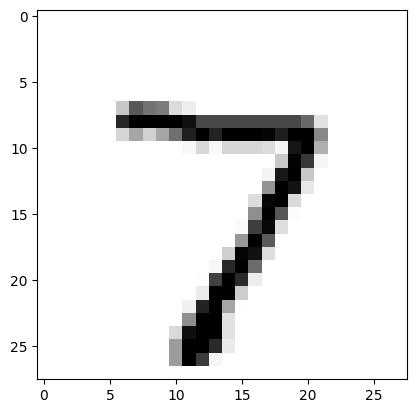

In [39]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [53]:
X_test[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [63]:
predictions = model.predict(X_test[:1]).round(3)
print(predictions.shape)
predictions

(1, 10)


array([[0.   , 0.   , 0.001, 0.002, 0.   , 0.   , 0.   , 0.998, 0.   ,
        0.   ]], dtype=float32)

In [58]:
predictions.argmax()

7

In [41]:
model.predict(X_test).argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [65]:
y_test[2]

1.0

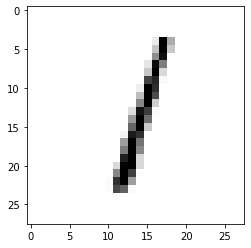

In [64]:
plt.imshow(X_test[2].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [46]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [139]:
# !pip install scikit-learn

In [141]:
# model = keras.models.Sequential()
# model.add(keras.layers.Input((n_cols,)) # Primera Pseudo-capa -> de matriz a array

# model.add(keras.layers.Dense(200, activation="relu")) # primera capa (hidden)
# model.add(keras.layers.Dropout(0.4)) 
# model.add(keras.layers.Dense(100, activation="relu")) # segunda capa (hidden)
# model.add(keras.layers.Dropout(0.4)) 
# # 
# model.add(keras.layers.Dense(units = 1, activation="sigmoid")) # Capa de salida (classification, 10 class)

# model.compile(loss="binary_crossentropy", optimizer="adamw", metrics=["accuracy"])

In [143]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.to_csv()

Divimos en train, test y validation

In [144]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [147]:
X_test.shape

(5160, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [51]:
X_train.shape[1:]

(8,)

In [69]:
keras.layers.Dense??

Init signature:
keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Source:        
@keras_export('keras.layers.Dense')
class Dense(Layer):
  """Just your regular densely-connected NN layer.

  `Dense` implements the operation:
  `output = activation(dot(input, kernel) + bias)`
  where `activation` is the element-wise activation function
  passed as the `activation` argument, `kernel` is a weights matrix
  created by the layer, and `bias` is a bias vector created by the layer
  (only applicable if `use_bias` is `True`). These are all attributes of
  `Dense`.

  Note: If the input to the layer has a rank greater than 2, then `Dense`
  computes the dot product between the `inputs` and the `kernel` along the
  last axis of the `inputs` and axis 0

In [148]:
X_train.shape[1:]

(8,)

In [164]:
model = keras.models.Sequential(
    [
    keras.layers.Dense(100, activation = 'relu', input_shape = X_train.shape[1:]),
                      keras.layers.Dropout(0.3),
                      keras.layers.Dense(100, activation = 'relu'),
                      keras.layers.Dropout(0.3),
                      keras.layers.Dense(1)
    
])

# model.add(keras.layers.Dense(30, activation = 'relu',
#                       input_shape = X_train.shape[1:]))

# model.add(keras.layers.Dense(30, activation = 'relu'))

# model.add(keras.layers.Dense(1))

model.compile(loss = "mean_squared_error",
             optimizer = "adamw")


c:\Users\Ort\miniconda3\envs\data_env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [165]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 100)            │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,101 (43.36 KB)

 Trainable params: 11,101 (43.36 KB)

 Non-trainable params: 0 (0.00 B)

In [166]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


checkpoint_cb = ModelCheckpoint("callback_model.h5", save_best_only=True, monitor = 'val_loss')
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5)


history = model.fit(X_train,
                   y_train,
                   epochs = 1000,
                #    batch_size = 32,
                   validation_data = (X_valid, y_valid),
                   callbacks= [checkpoint_cb, early_stopping])


Epoch 1/1000
332/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8570

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7935 - val_loss: 0.4909
Epoch 2/1000
317/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6761

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6709 - val_loss: 0.4446
Epoch 3/1000
332/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5637

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5615 - val_loss: 0.4224
Epoch 4/1000
361/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5064

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5063 - val_loss: 0.4141
Epoch 5/1000
341/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4722

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4725 - val_loss: 0.4117
Epoch 6/1000
347/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4823

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4824 - val_loss: 0.3950
Epoch 7/1000
348/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4385

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4384 - val_loss: 0.3946
Epoch 8/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4222 - val_loss: 0.4120
Epoch 9/1000
330/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4399

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4387 - val_loss: 0.3813
Epoch 10/1000
362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4162

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4161 - val_loss: 0.3687
Epoch 11/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4233 - val_loss: 0.3758
Epoch 12/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4117 - val_loss: 0.3715
Epoch 13/1000
360/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4096

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4095 - val_loss: 0.3639
Epoch 14/1000
319/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3845

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3849 - val_loss: 0.3624
Epoch 15/1000
356/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3682

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3684 - val_loss: 0.3485
Epoch 16/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3698 - val_loss: 0.3506
Epoch 17/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3829 - val_loss: 0.3609
Epoch 18/1000
337/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3615

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3623 - val_loss: 0.3428
Epoch 19/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4010 - val_loss: 0.3519
Epoch 20/1000
321/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3450

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3464 - val_loss: 0.3399
Epoch 21/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3604 - val_loss: 0.3423
Epoch 22/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3427 - val_loss: 0.3476
Epoch 23/1000
358/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3513

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3512 - val_loss: 0.3303
Epoch 24/1000
327/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3556

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3548 - val_loss: 0.3280
Epoch 25/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3381 - val_loss: 0.3323
Epoch 26/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3366 - val_loss: 0.3351
Epoch 27/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3396 - val_loss: 0.3292
Epoch 28/1000
347/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3389

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3391 - val_loss: 0.3250
Epoch 29/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3439 - val_loss: 0.3253
Epoch 30/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3350 - val_loss: 0.3287
Epoch 31/1000
361/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3302

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3301 - val_loss: 0.3218
Epoch 32/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3383 - val_loss: 0.3245
Epoch 33/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3293 - val_loss: 0.3327
Epoch 34/1000
335/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3309

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3310 - val_loss: 0.3206
Epoch 35/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3216 - val_loss: 0.3214
Epoch 36/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3276 - val_loss: 0.3310
Epoch 37/1000
342/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3306

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3306 - val_loss: 0.3157
Epoch 38/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3238 - val_loss: 0.3161
Epoch 39/1000
341/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3195

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3200 - val_loss: 0.3146
Epoch 40/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3194 - val_loss: 0.3232
Epoch 41/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3164 - val_loss: 0.3250
Epoch 42/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3098 - val_loss: 0.3206
Epoch 43/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3042 - val_loss: 0.3203
Epoch 44/1000
344/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3226

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3224 - val_loss: 0.3136
Epoch 45/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3154 - val_loss: 0.3156
Epoch 46/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3026 - val_loss: 0.3182
Epoch 47/1000
348/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3232

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3229 - val_loss: 0.3135
Epoch 48/1000
323/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3312

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3295 - val_loss: 0.3101
Epoch 49/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3040 - val_loss: 0.3114
Epoch 50/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3040 - val_loss: 0.3114
Epoch 51/1000
361/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3110

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3110 - val_loss: 0.3092
Epoch 52/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3086 - val_loss: 0.3122
Epoch 53/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3105 - val_loss: 0.3177
Epoch 54/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3049 - val_loss: 0.3099
Epoch 55/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3020 - val_loss: 0.3150
Epoch 56/1000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3041 - val_loss: 0.3111


In [167]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2535 
0.25832074880599976


In [168]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

In [169]:
r2_score(y_test, model.predict(X_test))

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step


0.8054056464529754

In [159]:
mean_absolute_percentage_error(y_test, model.predict(X_test))

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step


0.20776799061229703

In [56]:
y_pred = model.predict(X_test[:5])
y_pred

array([[2.7218366 ],
       [2.564496  ],
       [3.007024  ],
       [1.4103477 ],
       [0.81153166]], dtype=float32)

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [52]:
model.save("my_keras_model.h5")

In [76]:
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model.h5")

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [53]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.h5")
history = model.fit(X_train,
                   y_train,
                   epochs=30,
                   callbacks = [checkpoint_cb])

Epoch 1/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3037
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3016
Epoch 3/30
363/363 [==============================] - 2s 7ms/step - loss: 0.3008
Epoch 4/30
363/363 [==============================] - 2s 6ms/step - loss: 0.3801
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3096
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3082
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3046
Epoch 8/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3004
Epoch 9/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3029
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2999
Epoch 11/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2976
Epoch 12/30
363/363 [==============================] - 1s 4ms/step - loss: 0.2963
Epoch 13/30
363/363 [====

In [54]:
r2_score(y_test, model.predict(X_test)),mean_absolute_percentage_error(y_test, model.predict(X_test))

(0.7793336069182814, 0.2118270810837798)

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [94]:
keras.callbacks.EarlyStopping??

Init signature:
keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
)
Source:        
@keras_export('keras.callbacks.EarlyStopping')
class EarlyStopping(Callback):
  """Stop training when a monitored metric has stopped improving.

  Assuming the goal of a training is to minimize the loss. With this, the
  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
  `model.fit()` training loop will check at end of every epoch whether
  the loss is no longer decreasing, considering the `min_delta` and
  `patience` if applicable. Once it's found no longer decreasing,
  `model.stop_training` is marked True and the training terminates.

  The quantity to be monitored needs to be available in `logs` dict.
  To make it so, pass the loss or metrics at `model.compile()`.

  Args:
    monitor: Quantity to be monitored.
    min_delta: Minimum change in the monitored q

In [55]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.h5", 
                                                save_best_only=True)
history = model.fit(X_train,
                   y_train,
                   epochs=40,
                    validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb, checkpoint_cb])

Epoch 1/40
363/363 [==============================] - 2s 5ms/step - loss: 0.2843 - val_loss: 0.3092
Epoch 2/40
363/363 [==============================] - 1s 3ms/step - loss: 0.2840 - val_loss: 0.3133
Epoch 3/40
363/363 [==============================] - 1s 3ms/step - loss: 0.2857 - val_loss: 0.3148
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.2820 - val_loss: 0.3125
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.2828 - val_loss: 0.3210
Epoch 6/40
363/363 [==============================] - 1s 3ms/step - loss: 0.2810 - val_loss: 0.3112
